## Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

import warnings
from sklearn.metrics import mean_absolute_percentage_error

from models.ab import AnalogBivariate

## Load data

In [2]:
df = pd.read_excel('data.xlsx')

# Forecast

## Unit test

In [3]:
i_0_2006 = df[(df.Year == 2006)].index[0]
# 1
y1_test = df.iloc[i_0_2006 : i_0_2006 + 24]
# 2
y_test = df.iloc[i_0_2006 - 24 : i_0_2006]

# 3
y1_train = df.iloc[i_0_2006 - 8760 : i_0_2006 + 24 - 8760]
# 4
y_train = df.iloc[i_0_2006 - 8760 - 24 : i_0_2006 - 8760].Load
# 5
x_train_ref = df.iloc[i_0_2006 - 8760 - 24 : i_0_2006 - 8760].T1

data = df[df.index < x_train_ref.index[0]].T1

In [4]:
# 6
model1 = AnalogBivariate(data, x_train_ref, y_train, reg_model = 'Boosting', k = 10)
#7
model1.fit()

In [5]:
# 8
x_test_ref = df.iloc[i_0_2006 - 24 : i_0_2006].T1
data2 = df[df.index < x_test_ref.index[0]].T1

In [6]:
# 9
model2 = AnalogBivariate(data2, x_test_ref, y_test, reg_model = 'Boosting', k = 10)

In [7]:
model2.X1.shape

(24, 10)

In [8]:
model1.X1.shape

(24, 10)

In [12]:
y_pred = model1.model.predict(model2.X1)

[]

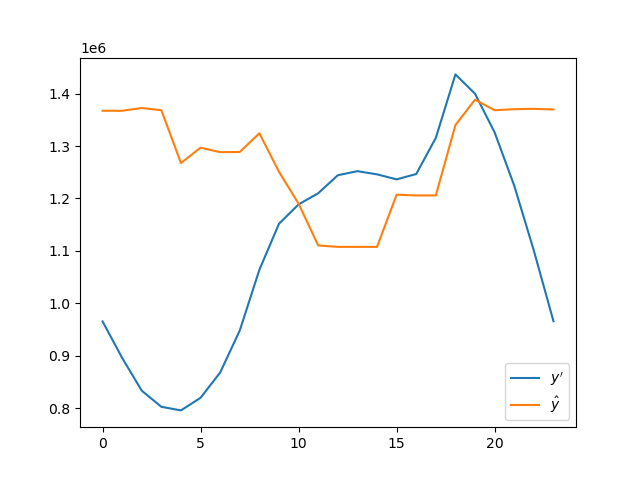

In [13]:
plt.figure()
plt.plot(y1_test.Load.values, label = '$y\'$')
plt.plot(y_pred, label = '$\hat{y}$')
plt.legend()
plt.plot()

## Full month

In [33]:
# 168 horas es una semana
# 744 horas un mes
# 8760 horas es un año

i_0_2007 = df[(df.Year == 2006)].index[0]
results_fm = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for d in range(i_0_2007, i_0_2007 + 8760, 24): # Cada día durante todo el año
        print(d - i_0_2007)
        i_0_2006 = d
        # 1
        y1_test = df.iloc[i_0_2006 : i_0_2006 + 24]
        # 2
        y_test = df.iloc[i_0_2006 - 24 : i_0_2006]

        # 3
        y1_train = df.iloc[i_0_2006 - 8760 : i_0_2006 + 24 - 8760]
        # 4
        y_train = df.iloc[i_0_2006 - 8760 - 24 : i_0_2006 - 8760].Load
        # 5
        x_train_ref = df.iloc[i_0_2006 - 8760 - 24 : i_0_2006 - 8760].T1

        data = df[df.index < x_train_ref.index[0] + 24].T1
        # 6
        model1 = AnalogBivariate(data, x_train_ref, y_train, reg_model = 'Boosting', k = 10)
        #7
        model1.fit()

        # 8
        x_test_ref = df.iloc[i_0_2006 - 24 : i_0_2006].T1
        data2 = df[df.index < x_test_ref.index[0] + 24].T1
        # 9
        model2 = AnalogBivariate(data2, x_test_ref, y_test, reg_model = 'Boosting', k = 10)
        # 10
        #model1.X1 = model2.X1
        y_pred = model1.predict()
        results_fm = np.append(results_fm, y_pred, axis = 0)
        if d >= i_0_2007 + 744 - 24:
            break


0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720


[]

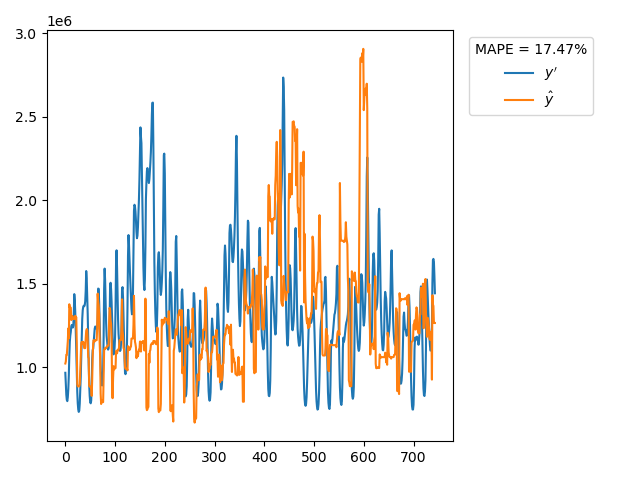

In [35]:
plt.figure()
plt.plot(df[df.Year == 2006].iloc[0:744].Load.values, label = '$y\'$')
plt.plot(results_fm, label = '$\hat{y}$')
plt.legend(title = 'MAPE = ' + str(round(model1.score() * 100, 2)) + '%', bbox_to_anchor=(1.36, 1))
plt.tight_layout()
plt.plot()

## Causal

In [36]:
# 168 horas es una semana
# 744 horas un mes
# 8760 horas es un año

i_0_2007 = df[(df.Year == 2007)].index[0]
results_ca = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for d in range(i_0_2007, i_0_2007 + 8760, 24): # Cada día durante todo el año
        # [ ] TODO: Falta hacerlo hora por hora :B
        print(d - i_0_2007)
        i_0 = d
        # 1
        y1_test = df.iloc[i_0 : i_0 + 24]
        # 2
        y_test = df.iloc[i_0 - 24 : i_0]

        # 3
        y1_train = df.iloc[i_0 - 8760 : i_0 + 24 - 8760]
        # 4
        y_train = df.iloc[i_0 - 8760 - 24 : i_0 - 8760].Load
        # 5
        x_train_ref = df.iloc[i_0 - 8760 - 24 : i_0 - 8760].T1

        # 8
        x_test_ref = df.iloc[i_0 - 24 : i_0].T1
        data2 = df[df.index < x_test_ref.index[0] + 24].T1
        # 9
        model1 = AnalogBivariate(data2, x_test_ref, y_train, reg_model = 'Boosting', k = 10)
        model1.fit()
        y_pred = model1.predict()

        results_ca = np.append(results_ca, y_pred, axis = 0)

0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720


[]

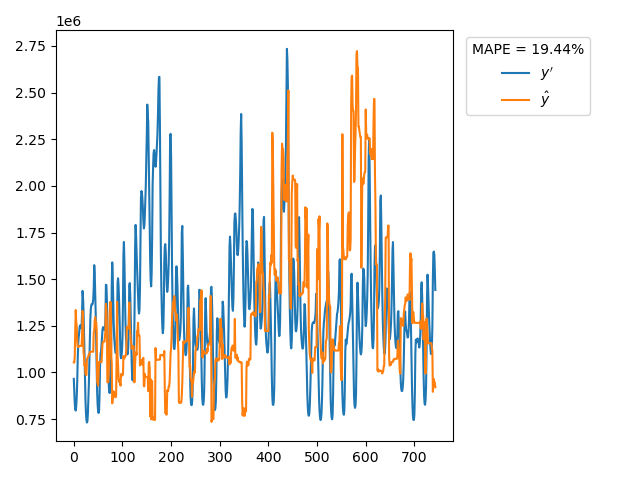

In [38]:
plt.figure()
plt.plot(df[df.Year == 2006].iloc[0:744].Load.values, label = '$y\'$')
plt.plot(results_ca, label = '$\hat{y}$')
plt.legend(title = 'MAPE = ' + str(round(model1.score() * 100, 2)) + '%', bbox_to_anchor=(1.36, 1))
plt.tight_layout()
plt.plot()